In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### Use of pandas library to read the data from the csv dataset for the properties of different houses in london

In [4]:
houses = pd.read_csv("London Property Listings Dataset.csv")

In [5]:
houses.head(10)

,Price,Property Type,Bedrooms,Bathrooms,Size,Postcode,Area,Price_Category,Area_Avg_Price
0,330000.0,Apartment,1.0,1.0,518.000000,E14,Eastern,Low,1.001684e+06
1,340000.0,Flat,1.0,1.0,887.498269,E14,Eastern,Low,1.001684e+06
2,340000.0,Apartment,1.0,1.0,934.569040,E14,Eastern,Low,1.001684e+06
3,340000.0,Flat,1.0,1.0,887.498269,E14,Eastern,Low,1.001684e+06
4,340000.0,Flat,1.0,1.0,388.000000,SW20,South Western,Low,1.516724e+06
5,340000.0,Apartment,2.0,1.0,230.000000,WC1N,Western Central,Low,1.625819e+06
6,340000.0,Flat,1.0,1.0,465.000000,E14,Eastern,Low,1.001684e+06
7,340000.0,Apartment,2.0,1.0,934.569040,SE18,South Eastern,Low,6.921048e+05
8,340000.0,Flat,2.0,2.0,665.000000,E14,Eastern,Low,1.001684e+06
9,340000.0,Apartment,2.0,1.0,934.569040,E14,Eastern,Low,1.001684e+06


#### Get the x and y values from the dataset
##### x values are all of the properties excluding price 
##### y values are all of the price values

In [ ]:
xlabel = houses.drop('Price', axis=1)
ylabel = houses["Price"]

print(xlabel.shape, ylabel.shape)


(29537, 27) (29537,)


#### Split the x and y values into training and testing data
##### 80% of data is training data whereas 20% is testing data
##### Random state controls the shuffling applied to data before the split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(xlabel, ylabel, test_size=0.2, random_state=42)


### Time to fit the training data to the linear regression model

In [24]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Gets the predicted price using the X test data with the model
#### Calculates the mean squared error and R squared value

In [25]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R2 value: {r2}')
print(f'MSE value: {mse}')

R2 value: 0.8209404068831356
MSE value: 133425715531.16774


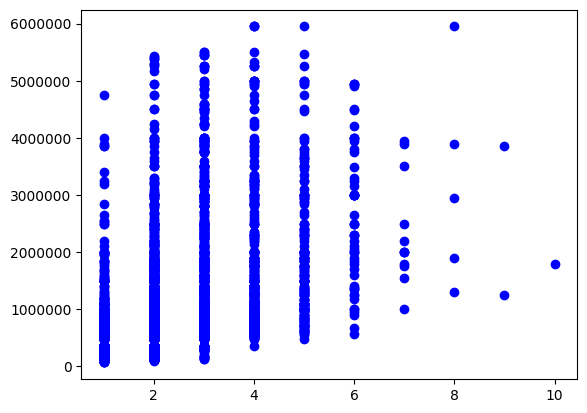

In [27]:
plt.ticklabel_format(style='plain')
plt.scatter(X_test['Bedrooms'], y_test, c='blue')

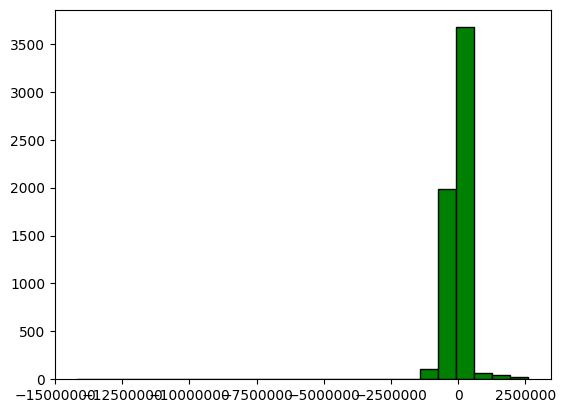

In [42]:
residualErrors = y_test - y_pred

plt.ticklabel_format(style='plain')
plt.hist(residualErrors, bins=25, color='green', edgecolor='black')
plt.show()

### Testing the model with new data under testHouseData
#### Created a new numpy array with data for a house
#### Changed it to a pandas dataframe as the model was trained on a pandas dataset
#### Gets predicted price from the model

In [ ]:
testHouseData = np.array([2, 2, 750, 1000000, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

testHouseData_df = pd.DataFrame([testHouseData], columns=X_train.columns)

predictedHousePrice = model.predict(testHouseData_df)

print(f'Predicted House Price: {predictedHousePrice[0]}')


Predicted House Price: 3068340.9492915217


### Adding the Ridge and Lasso models to improve model

In [36]:
ridgeHouseModel = Ridge(alpha=1.0)
ridgeHouseModel.fit(X_train, y_train)
ridgeR2 = ridgeHouseModel.score(X_test, y_test)
print(f'The R2 value for the ridge model: {ridgeR2}')


lassoHouseModel = Lasso(alpha=1.0, max_iter= 50000)
lassoHouseModel.fit(X_train, y_train)
lassoR2 = lassoHouseModel.score(X_test, y_test)
print(f'The R2 value for the lasso model: {lassoR2}')

The R2 value for the ridge model: 0.8207352476264662
The R2 value for the lasso model: 0.8209403407555161


## Random Forest regression